# Data Analytics

In [1115]:
# importing libraries
import requests
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Crawl Dataset

Perform web scraping on Yahoo Finance to obtain daily stock data of Nvidia from 1 January 2021 to 31 December 2023.
- What are the variables of interest?
- How was the data scraped/collected?

In [703]:
# scrape stock data
url = 'https://finance.yahoo.com/quote/NVDA/history/?period1=1609459200&period2=1703980800'
r = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})

In [705]:
# covert html table into dataframe
read_html_pandas_data = pd.read_html(r.text)[0]
read_html_pandas_data

,Date,Open,High,Low,Close Close price adjusted for splits.,Adj Close Adjusted close price adjusted for splits and dividend and/or capital gain distributions.,Volume
0,"Dec 29, 2023",49.81,50.00,48.75,49.52,49.51,389293000
1,"Dec 28, 2023",49.64,49.88,49.41,49.52,49.51,246587000
2,"Dec 27, 2023",49.51,49.68,49.08,49.42,49.41,233648000
3,"Dec 26, 2023",48.97,49.60,48.96,49.28,49.27,244200000
4,"Dec 22, 2023",49.19,49.38,48.47,48.83,48.82,252507000
...,...,...,...,...,...,...,...
761,"Jan 8, 2021",13.36,13.42,13.04,13.28,13.24,292528000
762,"Jan 7, 2021",12.97,13.38,12.89,13.34,13.31,461480000
763,"Jan 6, 2021",13.22,13.24,12.59,12.61,12.58,580424000
764,"Jan 5, 2021",13.10,13.44,13.09,13.40,13.37,322760000


In [707]:
# export dataframe to CSV file
read_html_pandas_data.to_csv('NVDA_stock_data.csv', index=False)

## 2a.  Data Preparation & Cleaning

In [1221]:
# create a copy
df = read_html_pandas_data.copy()

In [1223]:
# renaming the columns
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [1225]:
# the number of rows
print(f'Number of rows: {df.shape[0]}')

# the number of columns
print(f'Number of columns: {df.shape[1]}')

Number of rows: 766
Number of columns: 7


In [1227]:
# Checking for nulls in the table
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no null values in the table.

In [1230]:
# Check the data type for each row
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       766 non-null    object
 1   Open       766 non-null    object
 2   High       766 non-null    object
 3   Low        766 non-null    object
 4   Close      766 non-null    object
 5   Adj Close  766 non-null    object
 6   Volume     766 non-null    object
dtypes: object(7)
memory usage: 42.0+ KB


We observe that all of the columns have the data type `object`, even though we would expect the the `Date` column to have `datetime` data type, `Volume` column to have an `int` or `float` data type, and the rest of the columns to have `float` data type.

### Date column

Let's start with the `Date` column. Firstly, we check each row in the column, ensuring that they are all dates but with object data type.

In [1234]:
# count the number of rows that cannot be converted to datetime
pd.to_datetime(df['Date'], errors='coerce').isnull().sum()

0

Based on the result above, we can confirm that the rows in the `Date` column are all dates but with object data type (i.e. all rows can be converted to datetime data type).

So the logical next step is to convert the `Date` column's data type into `datetime`,

In [1237]:
# convert data type to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

### The rest of the columns

Now, let's take a closer look at the data in the `Open`, `High`, `Low`, `Close`, `Adj Close`, and `Volume` columns.

We begin by checking for non-numeric entries in these columns.

In [1240]:
# create a copy of df to only store numerical columns
df_num = df.copy()

# drop the Date column
df_num.drop('Date', axis=1, inplace=True)

# store numeric columns (to be used later)
num_cols = df_num.columns

In [1242]:
# create a copy of df
df_bool = df_num.copy()

# indicate the rows in each column that are non-numeric
for col in df_num.columns:
    df_bool[col] = pd.to_numeric(df_num[col], errors='coerce').isnull()

# locate rows in the dataframe that contain at least 1 non-numeric value
ser_bool = df_bool.any(axis=1)

# print an extract of the dataframe with rows that contain at least 1 non-numeric value
df_num = df_num[ser_bool]
display(df_num)

,Open,High,Low,Close,Adj Close,Volume
17,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend
81,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend
144,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend
209,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend
275,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend
335,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend
398,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend
467,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend
530,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend
595,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend


From the result above, we can see the rows that contain a least 1 numeric values. Notice that in every column, there are entries that are non-numerical, which explains the reason that Pandas assigns the `object` data type to these columns.

Before we drop these rows, we will take a look at any other data entries with the same date as these dividend payment / stock split events.

In [1246]:
# the list of dates when non-numeric entries are provided
date_non_numeric = list(df.loc[df_num.index, 'Date'])

# display all data in those dates
filetered_df = df.where(df['Date'].isin(date_non_numeric)).dropna()
display(filetered_df)

,Date,Open,High,Low,Close,Adj Close,Volume
17,2023-12-05,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend
18,2023-12-05,45.47,46.60,45.27,46.57,46.56,371718000
81,2023-09-06,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend
82,2023-09-06,48.44,48.55,46.58,47.06,47.05,468670000
144,2023-06-07,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend
145,2023-06-07,38.92,39.50,37.36,37.47,37.46,511998000
209,2023-03-07,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend
210,2023-03-07,23.60,24.13,23.24,23.29,23.28,515154000
275,2022-11-30,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend,0.00 Dividend
276,2022-11-30,15.70,16.93,15.60,16.92,16.91,565298000


It seems that, at the dates when dividend payment / stock split event occur, there is also stock price and volume data.

Moreover, I want to take a closer look at the stock split event to check whether the prices before and after the split are consistent.

In [1248]:
# extract date of stock split
bool_split = df['Open'].str.contains('Stock Splits')
date_split = df[bool_split]['Date']
date_split

626   2021-07-20
Name: Date, dtype: datetime64[ns]

The split happened on July 20th, 2021. To see whether the prices before and after the split are consistent, we will print a few rows of data, before and after the split date,

In [1251]:
# index of the stock split date
idx_split = date_split.index[0]

# print a few rows before and after the split
df.iloc[idx_split-3 : idx_split+4, :]

,Date,Open,High,Low,Close,Adj Close,Volume
623,2021-07-23,19.66,19.70,19.25,19.56,19.52,195672000
624,2021-07-22,19.64,19.89,19.28,19.59,19.56,323826000
625,2021-07-21,18.88,19.53,18.74,19.41,19.37,371017000
626,2021-07-20,4:1 Stock Splits,4:1 Stock Splits,4:1 Stock Splits,4:1 Stock Splits,4:1 Stock Splits,4:1 Stock Splits
627,2021-07-20,18.73,18.84,18.16,18.61,18.58,434687000
628,2021-07-19,17.92,19.04,17.87,18.78,18.74,749060000
629,2021-07-16,19.03,19.16,18.07,18.16,18.13,688224000


The prices before and after the stock split appear to be consistent (i.e. the prices have been adjusted). Therefore, so no further action is required (such as dividing or multipltying the price by 4 for a 4:1 stock split).

Lastly, we are going to store the date when dividend payment was made, (This is to be used later for Feature Generation.)

In [1255]:
# extract date of stock split
bool_divd = df['Open'].str.contains('Dividend')
date_divd = df[bool_divd]['Date']
date_divd

17    2023-12-05
81    2023-09-06
144   2023-06-07
209   2023-03-07
275   2022-11-30
335   2022-09-07
398   2022-06-08
467   2022-03-02
530   2021-12-01
595   2021-08-31
655   2021-06-09
720   2021-03-09
Name: Date, dtype: datetime64[ns]

Now let's drop these non-numeric rows,

In [1258]:
# drop non-numeric rows
df.drop(df_num.index, axis=0, inplace=True)

The next step is to change the data type of these numeric columns to float/integer,

In [1261]:
# change data type of numeric columns to 
for col in num_cols:
    df[col] = pd.to_numeric(df[col])

In [1263]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 765
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       753 non-null    datetime64[ns]
 1   Open       753 non-null    float64       
 2   High       753 non-null    float64       
 3   Low        753 non-null    float64       
 4   Close      753 non-null    float64       
 5   Adj Close  753 non-null    float64       
 6   Volume     753 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 47.1 KB


The data type has been appropriately changed.

For convenience, we will change the order of the dataframe, so that it is ordered based on the `Date` column in ascending order,

In [1267]:
df.sort_values('Date', ascending=True, inplace=True)

Use the `Date` column as the index for the dataframe,

In [1270]:
# use Date column as the dataframe index
df.set_index('Date', inplace=True)

### Outliers

We are now going to check for outliers/anomalies in the dataset, with the primary goal to detect unrealistic price points or volume spikes.

We are going to start with creating a histogram to get an overview of the distribution of the data points.

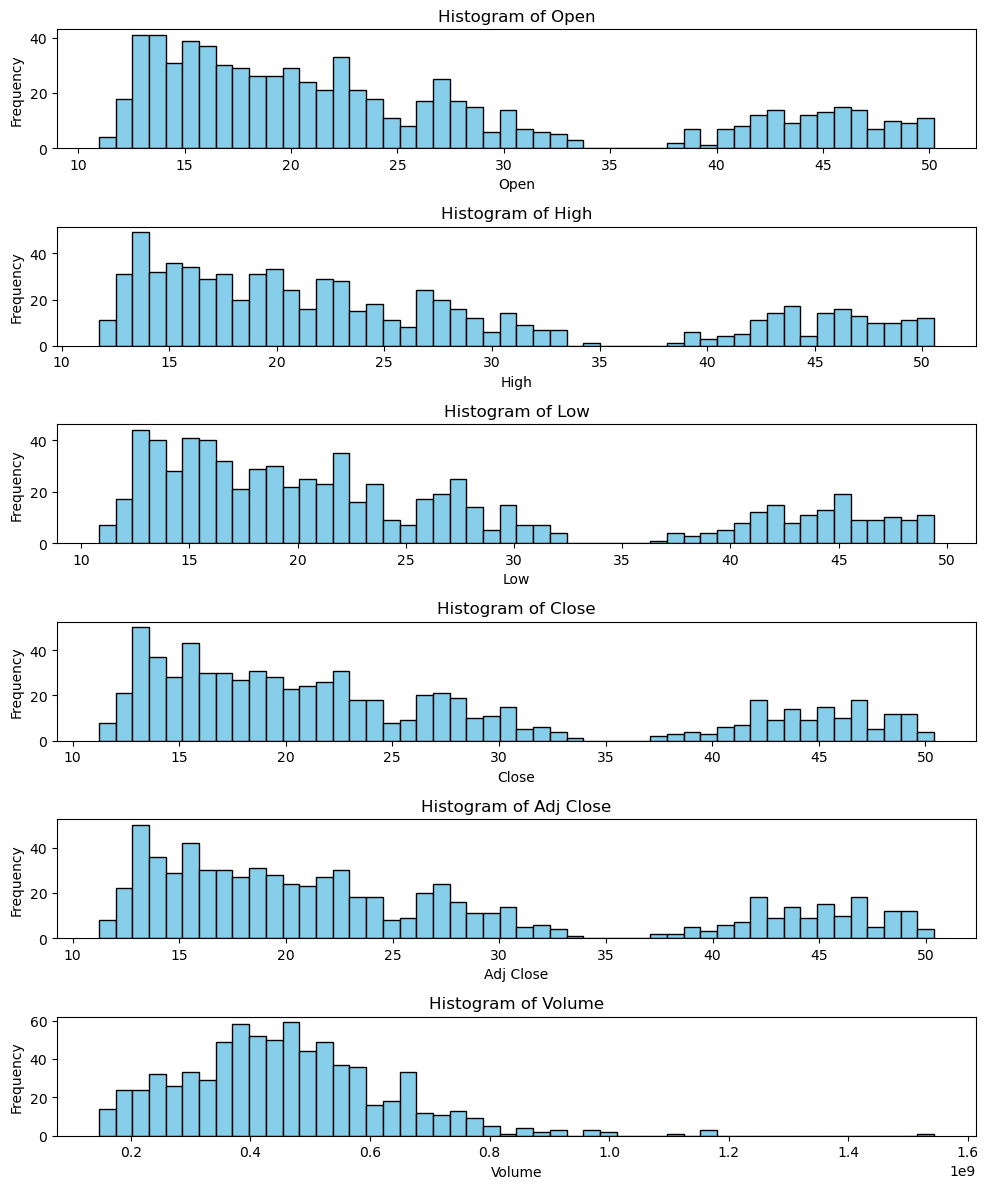

In [1273]:
# create histogram
fig, ax = plt.subplots(6, 1, figsize=(10, 12))
# loop thorugh each columns
for i, col in enumerate(df.columns):
    ax[i].hist(df[col], bins=50, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Histogram of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

# adjust layout to prevent overlap
plt.tight_layout()
plt.show()

For price data (including Open, High, Low, Close, and Adj Close), we observe that the price was generally trading around \\$10 to \\$50. We do not observe any unrealisticly price movements, such as the price dropping to $0 or spiking to extreme levels (such as to the hundreds or thousands), which suggests the the data is free from such obvious errors. Moreover, we also observe that the distribution of Open, High, Low, Close, and Adj Close prices are closely matching each other, which is what we wanted and expected to see.

For volume data, we observe that the daily traded volume is mostly around 500,000,000 shares. However, we do observe several data points that are well above the 1,000,000,000 shares. These higher volume amount are significantly above the usual daily traded volume, which could either be caused by unusual market activity or erroneous data.

To have a more concrete analysis, we are going to use the Tukey's Fences method for outlier detection. The reason for choosing this method over other methods (such as the 3$\sigma$ Rule) is because it is robust and non-parametric, which is ideal with our dataset that is not normally distributed (as shown in the histograms before).

With this rule, an upper and lower bound are defined. The upper bound is the Q3 plus 1.5 times the IQR; The lower bound is the Q1 minus 1.5 times IQR. Any data points that are above the upper bound or below the lower bound are defined as the outlier.

In [1276]:
# Tukey's Fences method
def tukeys_fences(col):
    Q1 = np.percentile(col, 25)  # first quartile
    Q3 = np.percentile(col, 75)  # third quartile
    IQR = Q3 - Q1  # interquartile range
    # compute the lower and upper boundary
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # define outliers
    outliers = col[(col < lower_bound) | (col > upper_bound)]
    return outliers

# apply Tuker's Fences method
print('List of outliers,')
for col in df.columns:
    outliers = tukeys_fences(df[col])
    print(f'{col}:', '\n', f'{outliers}')

List of outliers,
Open: 
 Date
2023-08-24    50.22
Name: Open, dtype: float64
High: 
 Series([], Name: High, dtype: float64)
Low: 
 Date
2023-08-31    48.96
2023-11-14    49.04
2023-11-17    49.01
2023-11-20    49.18
2023-11-21    49.22
2023-12-18    49.15
2023-12-19    48.90
2023-12-26    48.96
2023-12-27    49.08
2023-12-28    49.41
2023-12-29    48.75
Name: Low, dtype: float64
Close: 
 Date
2023-11-20    50.41
2023-11-21    49.94
2023-12-18    50.08
Name: Close, dtype: float64
Adj Close: 
 Date
2023-11-14    49.64
2023-11-20    50.39
2023-11-21    49.93
2023-12-18    50.07
2023-12-19    49.59
Name: Adj Close, dtype: float64
Volume: 
 Date
2021-04-12     869324000
2021-06-18     968856000
2021-11-04    1153631000
2022-01-24     913982000
2022-03-24     877379000
2022-05-26     996575000
2022-08-08     981859000
2022-09-01    1178865000
2023-02-23    1117995000
2023-05-25    1543911000
2023-05-30     923401000
2023-05-31    1002580000
2023-07-21     963769000
2023-08-24    1156044000


Comparing the result above and the histograms from before, notice that the outliers are all on the upside. The outliers on the price related features/columns can be explained due to NVDA's amazing performance in the latter part of 2023. Moreover, for the volume column, after cross checking with the news, these upside outliers are generally caused by earnings surprises.

We decide to keep these outliers in the dataset because these values are a result of significant market conditions (such as earnings surpise or macroeconomic events). Removing these data points would mean that we are removing valuable information that reflects NVDA stock's behaviour.

## 2b. Features Generation
In this step, we are going to generate more features, derived from the Open, High, Low, Close, Adj Close, and Volume features. The features we will create are,
- compute intraday daily return -> (close - open) / open
- compute close-to-close return (also called Daily Return) -> (Close_today - Closer_yesterday)/Close_yesterday
- cumulative returns (for example, assume you purchase the stock on Nov 25, 2022 and you are holding on to it until Nov 22, 2024)
- compute moving averages for the close price
- Compute daily volatility by copmuting the difference between High and Low
- Is there any other way to compute volatility (such as moving window standard deviation)?
- Extract the day from the date

*Note: From this point onward, 'closing price' will be used to refer to adjusted closing price.*

### Intraday Retrurn
It represents the return an investor receives if the stock was purchased at market open and then sold at market close. It is computed using the following formula,

$$Intraday Return = \frac{(Close_t - Open_t)}{Open_t}$$

In [1280]:
# compute intraday return
df['Intraday Return'] = (df['Adj Close'] - df['Open'])/df['Open']

### Daily Return
Daily Return or Close-to-Close Return is computed using interday closing prices, here is the formula,

$$Daily Return = \frac{(Close_t - Close_{t-1})}{Close_{t-1}}$$

In [1285]:
# compute close-to-close return (i.e. daily return)
df['Daily Return'] = (df['Adj Close'] - df['Adj Close'].shift(1)) / df['Adj Close'].shift(1)

### Cumulative Return
It is the compounded growth of an investment, asusming that all returns are reinvested. It is computed as follows,

$$Cumulative Return_t = \prod_{i=1}^t (1 + r_i) - 1$$

In [1288]:
# compute cumulative return
df['Cumulative Return'] = (df['Daily Return'] + 1).cumprod() - 1

### High-Low Rage
The difference between the day's high and low. It is used to measure intraday volatility.

In [1294]:
# compute high-low range
df['High-Low Range'] = df['High'] - df['Low']

### 10-Day Moving Standard Deviation
The standard deviation of the Daily Returns from the past 10 trading days. The 10-day moving standard deviation at time t is,

$$\text{10-Day Moving Std.} = \frac{1}{10} \sum_{i=t-9}^{t} Daily\_Return_i$$

$$\sigma_{t,10} = \sqrt{\frac{1}{10} \sum_{i=0}^{9} (x_{t-i} - \bar{x}_{t,10})^2}$$

In [1298]:
# compute 10-day moving std
df['10-day Moving Std'] = df['Daily Return'].rolling(window=10).mean()

### Weekday, Month, and Year 
Parse the weekday, month, and year from the date.

In [1562]:
# Extract the day from the date
df['Weekday'] = list(pd.Series(df.index).dt.day_name())
df['Month'] = df.index.month.astype(str)
df['Year'] = df.index.year.astype(str)

### Dividend Paymment Date

Create a column to indicate whether dividend is distributed on that date.

In [1307]:
# create the dividend indicator
df['Dividend Paid'] = df.index.isin(pd.to_datetime(date_non_numeric))

## 3. Exploratory Data Analysis (EDA)
In approaching EDA, we will start bu analyzing and undersatanding the dataset as a whole, and then we will break it down into groups (i.e. Weekdays and Months) for more detailed analysis.

The approach for EDA is that we are going to start considering the dataset as a whole. Then we would group the dataset into Weekdays, and analyze the groups. We are then going to do the same steps with monthly groupings.
- Aggregated Level
    - (Done) The stock price range (highest and lowest adjsuted price)
    - (Done) The average daily return
    - (Done) Annualized standard deviation of daily returns
    - (Done) Explore distribution of Returns -> Test for normality: Histogram, Shapiro-Wilk test
    - (Done) Plot cumulative returns
    - (Done) The top 10 largest returns
    - (Done) The top 10 smallest returns
    - (Done) The date of top 10 largest magnitude of returns -> see for volatility clustering
    - (Done) Compare the traded volume in non-event day and in dividend payment day
    - (Done) Count the number of upticks (positive returns) and downticks (negative returns) -> to mix things up, you can copmute the percentage of the count and then plot pie chart
    - (Done) Relationship between high-low range (i.e. intraday valatility) and volume -> scatter plot and compute correlations.
    - (Done) Check correlations during extreme events (e.g., when Daily Return is in the top or bottom 10%), between high-low range and volume. -> refer to code labeled (A)
    - (Done) Relationship High-Low Range vs. Intraday Return -> Larger ranges might correspond to higher intraday returns, as these represent days with more price movement.
- Weekday Level
    (Create a function for each one of these so we can reuse it for monthly gropuing and yearly gropuing)
    - Rank the weekdays in terms of average returns -> draw a bar chart to compare
    - Rank the weekdays in terms of total traded volumes -> draw bar chart
    - Rank the weekdays in terms of annualzied standard deviation of daily returns -> draw bar chart
    - For each Compute the difference between upticks (positive returns) and downticks (negative returns)
- Monthly Level

### Aggregated Level

We begin by analyzing the dataset in its entirety to understand the general trends and key statistics of NVDA stock data.

**Stock Price Range**

In [1315]:
# stock price range
price_range = df['Adj Close'].max() - df['Adj Close'].min()
print(price_range)

39.17


The difference between highest and lowest price during the 3-year period was $39.17.

**Average Daily Return**

In [1722]:
# average daily return
average_daily_return = df['Daily Return'].mean()
print(f'{round(average_daily_return * 100, 2)}%')

0.23%


On average, an investor would receive 0.23% return per day by investing in NVDA.

**Annualized Std. of Daily Returns**

It is a measure of volatility of the stock. It provides insight regarding the risk of investing in this asset for a whole year. To compute it, we first compute the standard deviation of the daily returns, and then we annualize it by multiplying the standard deviation by $\sqrt{252}$.

In [1319]:
# copmute the std of daily returns
daily_std = df['Daily Return'].std()

# annualize the daily_std
annualized_std = daily_std * np.sqrt(252) * 100
print(f'{round(annualized_std,2)}%')

53.01%


The annualized standard deviation of NVDA's daily returns is 53.01%. It is more than double the typical volatility of the S&P500, which is usually around 20%. Of course this is to be expected due to the diversification effect on the S&P500.

**Cumulative Returns**

The cumulative returns have been computed in the "2b. Features Generation". Here, we are going to plot the cumulative returns, 

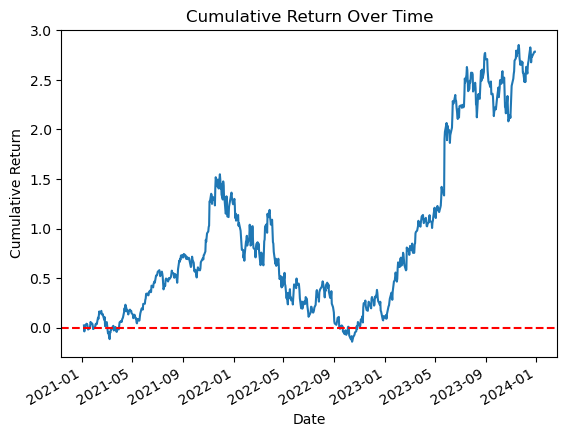

Cumulative Return on 2023-12-29 is 278.52%


In [1323]:
# plot the cumulative return
df['Cumulative Return'].plot()
plt.title('Cumulative Return Over Time') # add title
plt.ylabel('Cumulative Return') # add y axis label

# plot a horizontal line on y = 0
plt.axhline(y=0.0, color='red', linestyle='--')

plt.show()

# print cumulative return at the end of the time period
print(f'Cumulative Return on {df.index[-1].date()} is {round(df["Cumulative Return"][-1] * 100, 2)}%')

If an investor bought NVDA stock in the beginning of 2021, they would receive an impressive 279% return over the span of 3-year period. For comparison, the S&P500's cumulative return over the same time span was only around 28%, highlighting NVDA's impressive outperformance.

Moreover, throughout the period, the cumulative return remained positive most of the time. The stock was intially able to reach the 150% level in December 2021. However it swiftly dropped to its the lowest point in October 2022. But then short after, the stock quickly recovered, surging to a cumulative return of 279% in just over a year.

**Normality Test on the NVDA Returns**

We are going to visually test for normality of NVDA's daily returns. Let's start with a histogram,

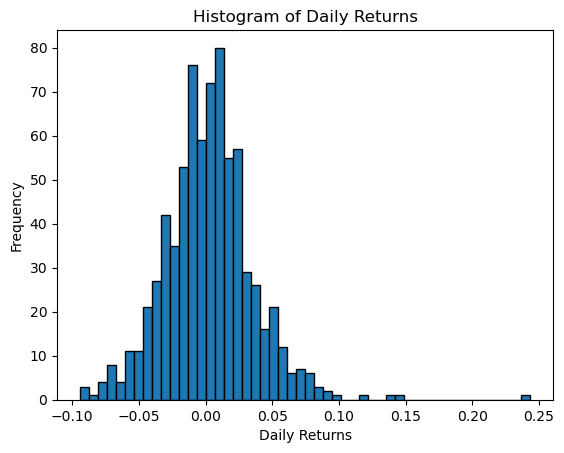

In [1326]:
# plot histogram
plt.hist(df['Daily Return'], bins=50, edgecolor='black')
plt.title('Histogram of Daily Returns') # add title
plt.xlabel('Daily Returns') # add x axis label
plt.ylabel('Frequency') # add y axis label
plt.show()

The histogram shows that the distribution of daily returns are fairly bell-shaped. However, we do notice that it has a fat tail on the right side of the distribution.

To properly test for nomality, we are going to use the Shapiro-Wilk Test to test for normallity. The hypotheses are,
>H_0: The undelying population is normally distributed.

>H_1: The underlying population is NOT normally distributed.

In [1329]:
# Shapiro-Wilk test
stat, p_val = sp.stats.shapiro(df['Daily Return'])

# decision making: 0.05 significance level (alpha)
alpha = 0.05
if p_val > alpha:
    print(f'Since p-value ({p_val}) > {alpha}, we fail to reject the null hypothesis.')
else:
    print(f'Since p-value ({p_val}) < {alpha}, we reject the null hypothesis.')

Since p-value (1.0) > 0.05, we fail to reject the null hypothesis.


From the Shapiro-Wilk test, we can conclude that the Daily Return is normally distributed.

**The Top 10 Largest Daily Returns and Top 10 Smallest Daily Returns**

In [1603]:
# plot bar chart
def plot_bar(x, y, title, xlabel, ylabel, x_rotation):
    # create bar chart
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=x_rotation) # rotate the x axis label
    plt.show()

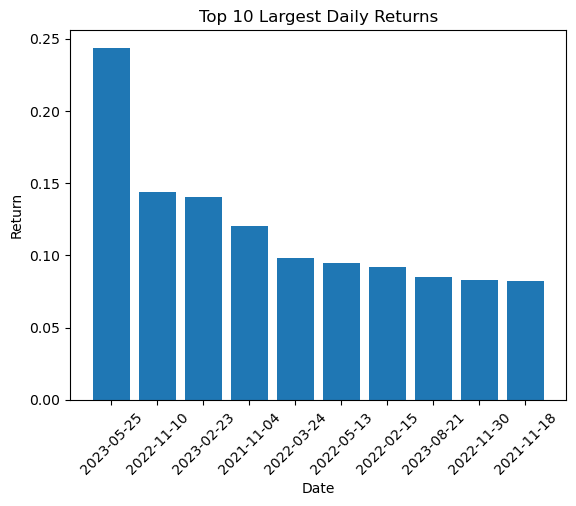

In [1605]:
# Sort the data to get the top 10 largest returns
top_10_largest = df[['Daily Return']].sort_values(by='Daily Return', ascending=False).head(10)

# Plotting the top 10 largest returns
plot_bar(top_10_largest.index.strftime('%Y-%m-%d'),
         top_10_largest['Daily Return'],
         'Top 10 Largest Daily Returns',
         'Date',
         'Return',
         45)

The bar chart shows that the largest daily return was on May 25, 2023 at around 24%. It is almost twice as large as the send largest daily return. The reason for this large return was due to Nvidia's earnings was able to greatly beat analysts' estimates.

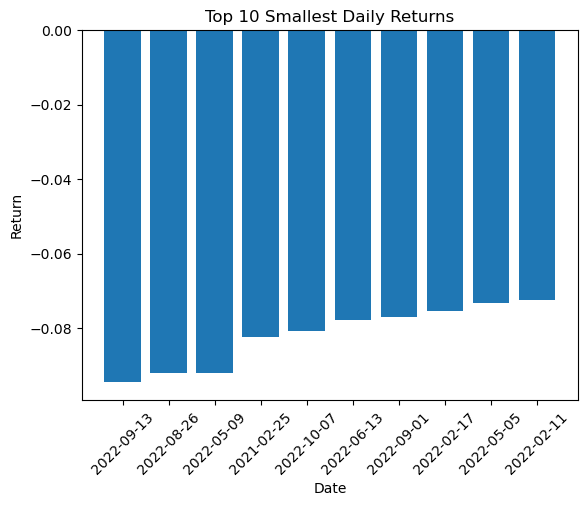

In [1607]:
# Sort the data to get the top 10 largest returns
top_10_smallest = df[['Daily Return']].sort_values(by='Daily Return', ascending=True).head(10)

# Plotting the top 10 largest returns
plot_bar(top_10_smallest.index.strftime('%Y-%m-%d'),
         top_10_smallest['Daily Return'],
         'Top 10 Smallest Daily Returns',
         'Date',
         'Return',
         45)

The top 10 smallest daily return figures are more tighly packed together. The largest drop happened on September 13, 2022 at around -9.5%. While the second and third largest drop were closer to the -9.0% level.

**Average Traded Volume on Dividend Payment Date**

We are now going to compare the average daily volume between when dividends are paid and when they are not.

Dividend Paid
False    4.588532e+08
True     4.446749e+08
Name: Volume, dtype: float64


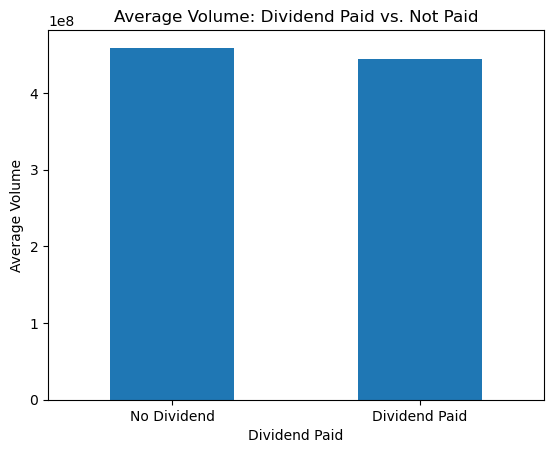

In [1358]:
# Group by 'Dividend Paid' column and compute mean
avg_volume = df.groupby('Dividend Paid')['Volume'].mean()
print(avg_volume)

# plot the average volumes
avg_volume.plot(kind='bar')
plt.title('Average Volume: Dividend Paid vs. Not Paid')
plt.xlabel('Dividend Paid')
plt.ylabel('Average Volume')
plt.xticks(ticks=[0, 1], labels=['No Dividend', 'Dividend Paid'], rotation=0)
plt.show()

We observe that the trading volume is lower on days when dividends are paid compared to days when no dividend is paid. This could be attributed to the fact that macroeconomic events, company-specific news, and other market events are more of a needle mover. As dividend payments are typically anticipated (i.e. it does not provide immediate new information), they may not generate the same level of market activity.

**Upticks and Downticks**

We are going to count the number of upticks (positive returns) and downticks (negative returns). 

In [1368]:
# count the number of positive and negative returns
n_upticks = (df['Daily Return'] > 0).sum()
n_downticks = (df['Daily Return'] < 0).sum()

In [1370]:
# copmute the percentage of upticks and downticks
total = n_upticks + n_downticks
uptick_pct = (n_upticks / total) * 100
downtick_pct = (n_downticks / total) * 100

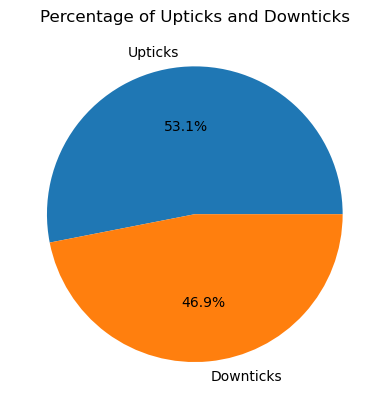

In [1378]:
# plot the pie chart
plt.pie([uptick_pct, downtick_pct], labels=['Upticks', 'Downticks'], autopct='%1.1f%%')
plt.title('Percentage of Upticks and Downticks')
plt.show()

There are 6.2% more upticks and downticks. This tendency of the stock price to go up contributes to NVDA's remarkable performance over the time period.

**High-Low Range vs Volume**

We are going to analyze the relationship between the High-Low Range and Volume. To do so, we will create a scatter plot and compute the correlation coefficient.

In [1466]:
# a function to create scatter plot and compute correlation coef
def plot_scatter_corr(df, x, y, title, xlabel, ylabel):
    # create scatter plot
    sns.scatterplot(x, y, data=df)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    # compute and print correlation coef
    correlation = df[[x, y]].corr()
    display(correlation)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


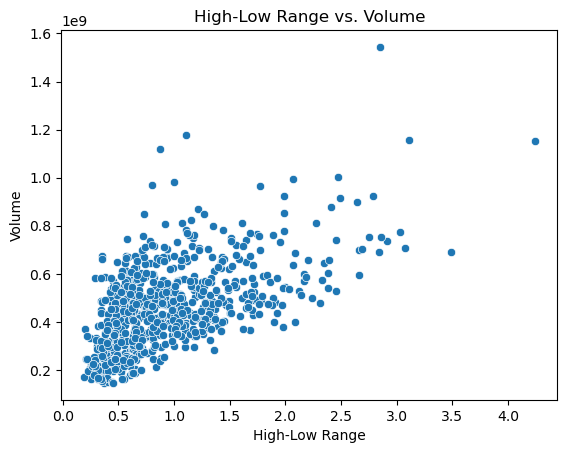

,High-Low Range,Volume
High-Low Range,1.00000,0.58012
Volume,0.58012,1.00000


In [1468]:
# create scatter plot and corr coef
plot_scatter_corr(df, 'High-Low Range', 'Volume', 'High-Low Range vs. Volume', 'High-Low Range', 'Volume')

We observe a positive correlation between volume and high-low range, with correlation coefficient of 0.58. In other words, When a stock experiences a large intraday volatility, it is often accompanied by increased trading volume. This observation makes logical sense because in order to greatly move the price up/down, a large number of shares would need to be traded.

Let's dive deeper in analyzing this correlation by specifically focusing on 'extreme' events, i.e. when the Daily Return is in the top or bottom 10%.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


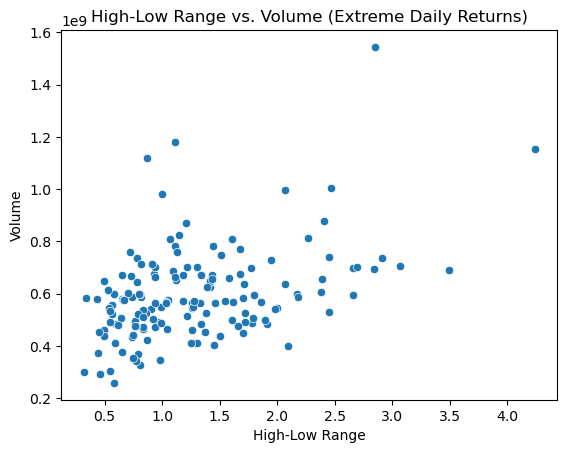

,High-Low Range,Volume
High-Low Range,1.000000,0.438862
Volume,0.438862,1.000000


In [1471]:
# create scatter plot and corr coef
df_ext = df[(df['Daily Return'] > df['Daily Return'].quantile(0.90)) | (df['Daily Return'] < df['Daily Return'].quantile(0.10))]
plot_scatter_corr(df_ext, 'High-Low Range', 'Volume', 'High-Low Range vs. Volume (Extreme Daily Returns)', 'High-Low Range', 'Volume')

We observe a similar trend when focsuing on both the entire dataset and the extreme value case. But interestingly, the correlation coefficient for the extreme value case is 0.44, which is lower than that for the entire dataset. This suggests a weaker positive relationship.

**High-Low Range vs Intraday Return**

We are going to investigate the relationship between high-low range and the magnitude of intraday return. Just like before, we are going to compute a scatter plot and correlation coefficient.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


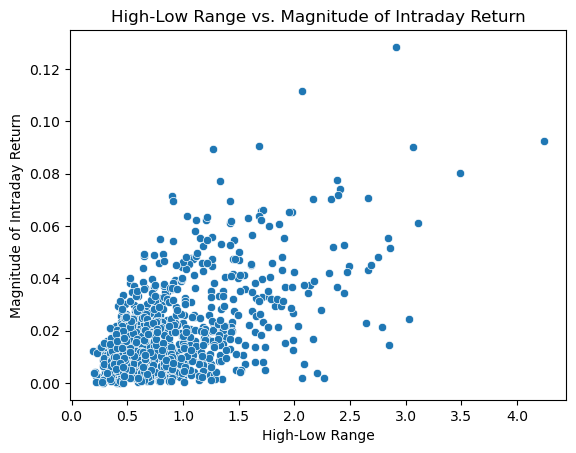

,High-Low Range,Magnitude of Intraday Return
High-Low Range,1.000000,0.549009
Magnitude of Intraday Return,0.549009,1.000000


In [1473]:
# compute the magnitude of Intraday Return (absolute value)
df['Magnitude of Intraday Return'] = df['Intraday Return'].abs()

# create scatter plot and corr coef
plot_scatter_corr(df, 'High-Low Range', 'Magnitude of Intraday Return', 'High-Low Range vs. Magnitude of Intraday Return', 'High-Low Range', 'Magnitude of Intraday Return')

We observe a positive correlation between the High-Low Range and the magnitude of the Intraday Return, with a correlation coefficient of 0.55. The scatter plot also shows a clear positive trend. This observation is similar to what I initially expected. As larger intraday returns (in magnitude) typically correspond to larger High-Low Ranges; while days with smaller intraday returns (in magnitude) can be accompanied by either large or small High-Low Ranges.

### Weekday Level
In Weekday level of analysis, the dataset is going to be grouped by the day of the week to explore any potential patterns across different weekdays.

**Averege Returns**

We are going to group the dataset by the Weekday, and then compute the average daily return.

In [1579]:
# compute the average return grouped by the specified column
def compute_average_return_by_group(df, group_by_column):
    # group by the 'group_by_column' and compute the avg of 'Daily Return'
    avg_returns = df.groupby(group_by_column)['Daily Return'].mean().reset_index()
    # rename the column
    avg_returns.rename(columns={'Daily Return': 'Average Return'}, inplace=True)
    # sort by average return
    avg_returns.sort_values(by='Average Return', ascending=False, inplace=True)
    return avg_returns

,Weekday,Average Return
2,Thursday,0.006395
1,Monday,0.003717
3,Tuesday,0.002255
4,Wednesday,0.000251
0,Friday,-0.000841


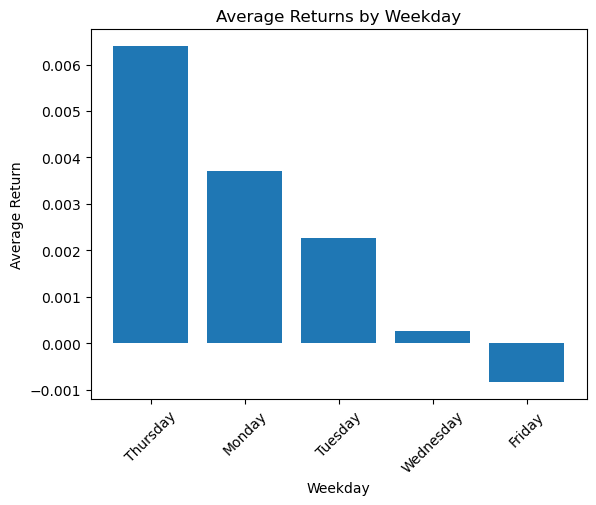

In [1609]:
# compute average returns grouped by weekdays
average_returns_by_weekday = compute_average_return_by_group(df, 'Weekday')
display(average_returns_by_weekday)

# plot bar chart
plot_bar(average_returns_by_weekday['Weekday'],
         average_returns_by_weekday['Average Return'],
         'Average Returns by Weekday', 'Weekday', 'Average Return', 45)

There were significant differences in the average returns across weekdays. I had expected the average returns between the groups to be similar, but it turned out that Thursdays historically yielded the highest average return of 0.64%. On the other hand, Fridays appeared to be a less favorable day for holding a long position, as they showed an average return of -0.08%.

**Total Volumes**

We are going to group the dataset by the Weekday, and then compute the total volumes.

In [1661]:
# compute the total traded volume grouped by the specified column
def compute_total_volume_by_group(df, group_by_column):
    # group by the 'group_by_column' and compute the avg of 'Daily Return'
    total_volumes = df.groupby(group_by_column)['Volume'].sum().reset_index()
    # rename the column
    total_volumes.rename(columns={'Volume': 'Total Volume'}, inplace=True)
    # sort by the total volume
    total_volumes.sort_values(by='Total Volume', ascending=False, inplace=True)
    return total_volumes

,Weekday,Total Volume
2,Thursday,74567357000
4,Wednesday,71033310000
0,Friday,69985692000
3,Tuesday,68864430000
1,Monday,60881367000


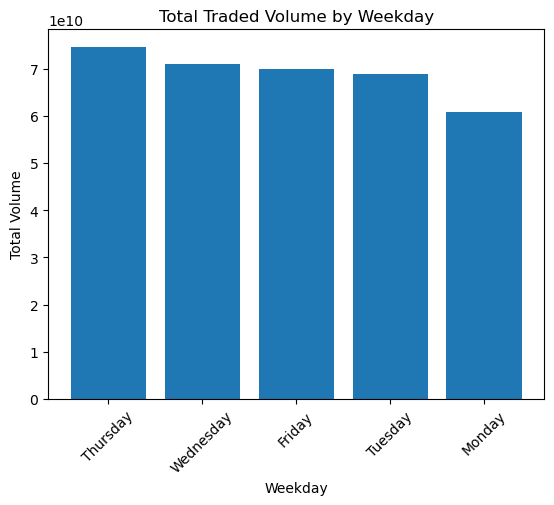

In [1663]:
# compute total volumes grouped by weekdays
total_volume_by_weekday = compute_total_volume_by_group(df, 'Weekday')
display(total_volume_by_weekday)

# plot bar chart
plot_bar(total_volume_by_weekday['Weekday'],
         total_volume_by_weekday['Total Volume'],
         'Total Traded Volume by Weekday', 'Weekday', 'Total Volume', 45)

We observed that Thursday had the highest total traded volume, exceeding 74 billion shares over the 3-year period. Wednesday and Friday followed closely, with 71 billion and 70 billion shares, respectively. In contrast, Monday recorded the lowest total traded volume, with only 60 billion shares.

Combining this insight with the analysis of the Average Return chart from earlier, we noted that the large average return on Thursday was accompanied by high trading volume. This observation suggests a potential positive correlation between trading volume and market activity on Thursdays.

**Annualized Standard Deviation of Daily Return**

We are going to group the dataset by the Weekday, and then compute the annualized standard deciation of the daily return.

In [1673]:
# compute the annualized standard deviation of returns grouped by the specified column
def compute_annualized_std_by_group(df, group_by_column):
    # group by the specified column and compute the std of 'Daily Return'
    std_dev = df.groupby(group_by_column)['Daily Return'].std()
    # annualize the standard deviation
    annualized_std = std_dev * (252 ** 0.5)
    # reset the index for readability
    annualized_std = annualized_std.reset_index()
    # rename the column
    annualized_std.rename(columns={'Daily Return': 'Annualized Std'}, inplace=True)
    # sort by teh Annualized Std
    annualized_std.sort_values(by='Annualized Std', ascending=False, inplace=True)
    return annualized_std

,Weekday,Annualized Std
2,Thursday,0.680024
1,Monday,0.505257
4,Wednesday,0.487184
0,Friday,0.477784
3,Tuesday,0.468125


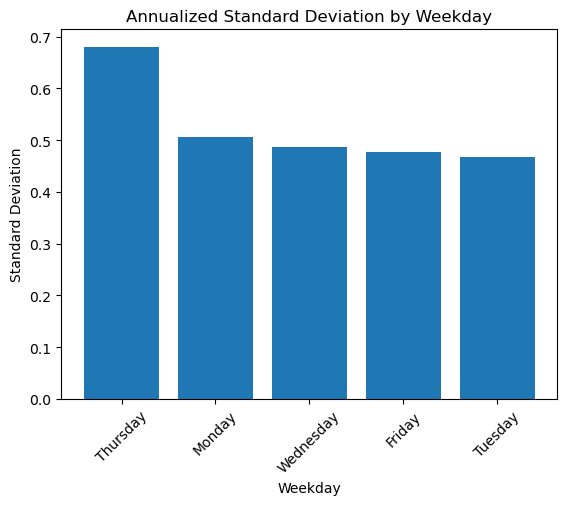

In [1675]:
# Compute annualized standard deviation grouped by weekdays
annualized_std_by_weekday = compute_annualized_std_by_group(df, 'Weekday')
display(annualized_std_by_weekday)

# plot bar chart
plot_bar(annualized_std_by_weekday['Weekday'],
         annualized_std_by_weekday['Annualized Std'],
         'Annualized Standard Deviation by Weekday', 'Weekday', 'Standard Deviation', 45)

Based on our previous analysis, Thursday had the highest average return and total volume. It is, therefore, not surprising to see that Thursday also had the largest annualized standard deviation at 0.68, indicating very high volatility. Moreover, the gap between Thursday and the other weekdays was quite significant. For example, Monday, which had the second-highest annualized standard deviation, showed a difference of approximately 0.20.

### Month Level
We are moving on to grouping by Month to check for any patterns across different months.

**Averege Returns**

We are going to group the dataset by the Month, and then compute the average daily return.

,Month,Average Return
2,11,0.010337
7,5,0.007317
4,2,0.004718
9,7,0.004503
5,3,0.004423
1,10,0.004356
0,1,0.002260
8,6,0.002181
10,8,0.000607
3,12,-0.002591


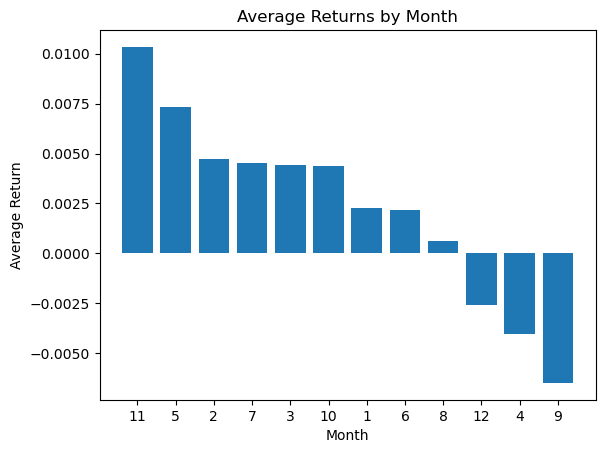

In [1684]:
# Compute average returns grouped by month
average_returns_by_month = compute_average_return_by_group(df, 'Month')
display(average_returns_by_month)

# plot bar chart
plot_bar(average_returns_by_month['Month'],
         average_returns_by_month['Average Return'],
         'Average Returns by Month', 'Month', 'Average Return', 0)

From the chart above, we can see that November and May stood out as the most profitable months, with average daily returns of 1.0% and 0.7%, respectively. Furthermore, the months of February, July, March, and October showed very similar performances, each with an average return of around 0.45%. In contrast, September was the least profitable month, with an average daily return of -0.65%. It is worth noting that, with a larger dataset, the average daily returns for each month would likely become more similar.

**Total Volumes**

We are going to group the dataset by the Month, and then compute the total volumes.

,Month,Total Volume
7,5,32585220000
10,8,32118186000
8,6,31355133000
5,3,30556986000
2,11,30556391000
4,2,27718073000
1,10,27661456000
3,12,27416544000
9,7,27094398000
11,9,26708837000


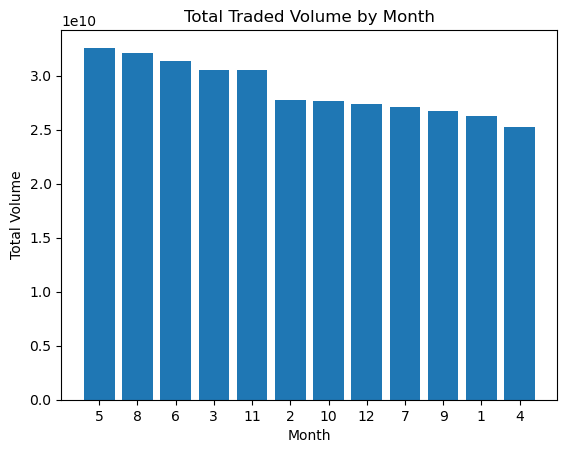

In [1632]:
# compute total volumes grouped by moenth
total_volume_by_month = compute_total_volume_by_group(df, 'Month')
display(total_volume_by_month)

# plot bar chart
plot_bar(total_volume_by_month['Month'],
         total_volume_by_month['Total Volume'],
         'Total Traded Volume by Month', 'Month', 'Total Volume', 0)

The total traded volume was led by the month of May with 32.6 billion shares, and closely followed by August with 32.1 billion shares. On the other hand, April recorded the lowest total traded volume at just 25.3 billion shares.

By combining analysis from the previous chart, I have noticed an interesting observation. The total traded volume in September was relatively small compared to the other months, eventhough September generated a large magnitude of return, in which we would expect a high market activity. This contrasts with May, where the large return magnitudes were accompanied by high market activity. This pattern may suggest a potential positive correlation between daily returns and traded volume.

**Annualized Standard Deviation of Daily Return**

We are going to group the dataset by the Month, and then compute the annualized standard deciation of the daily return.

,Month,Annualized Std
7,5,0.740653
4,2,0.647195
2,11,0.574138
5,3,0.543527
0,1,0.539568
3,12,0.505561
10,8,0.496347
6,4,0.482955
8,6,0.474419
1,10,0.463880


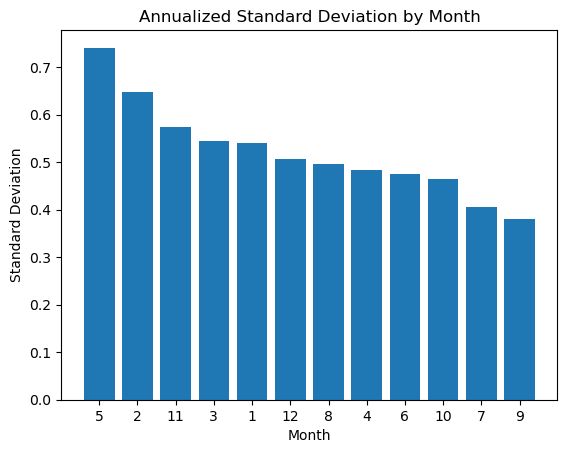

In [1677]:
# Compute annualized standard deviation grouped by month
annualized_std_by_month = compute_annualized_std_by_group(df, 'Month')
display(annualized_std_by_month)

# plot bar chart
plot_bar(annualized_std_by_month['Month'],
         annualized_std_by_month['Annualized Std'],
         'Annualized Standard Deviation by Month', 'Month', 'Standard Deviation', 0)

As expected, the month of May and November had a high standard deviations at 0.741 and 0.574, respectively, since in those months, we observe a high market activity and average daily return. Moreover, we notice that September had a relatively low volatility with annualized standard deviation of only 0.38, eventhough in the same month, we observe a large average negative return.

## 4. Ask Questions About The Data

In [1478]:
df

,Open,High,Low,Close,Adj Close,Volume,Intraday Return,Daily Return,Cumulative Return,10-Day Moving Average,High-Low Range,10-day Moving Std,Weekday,Month,Year,Dividend Paid,Magnitude of Intraday Return
Date,,,,,,,,,,,,,,,,,
2021-01-04,13.10,13.65,12.96,13.11,13.08,560640000,-0.001527,NaN,NaN,NaN,0.69,NaN,Monday,1,2021,False,0.001527
2021-01-05,13.10,13.44,13.09,13.40,13.37,322760000,0.020611,0.022171,0.022171,NaN,0.35,NaN,Tuesday,1,2021,False,0.020611
2021-01-06,13.22,13.24,12.59,12.61,12.58,580424000,-0.048411,-0.059088,-0.038226,NaN,0.65,NaN,Wednesday,1,2021,False,0.048411
2021-01-07,12.97,13.38,12.89,13.34,13.31,461480000,0.026214,0.058029,0.017584,NaN,0.49,NaN,Thursday,1,2021,False,0.026214
2021-01-08,13.36,13.42,13.04,13.28,13.24,292528000,-0.008982,-0.005259,0.012232,NaN,0.38,NaN,Friday,1,2021,False,0.008982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,49.19,49.38,48.47,48.83,48.82,252507000,-0.007522,-0.003267,2.732416,48.513,0.91,0.002891,Friday,12,2023,False,0.007522
2023-12-26,48.97,49.60,48.96,49.28,49.27,244200000,0.006126,0.009218,2.766820,48.778,0.64,0.005665,Tuesday,12,2023,False,0.006126
2023-12-27,49.51,49.68,49.08,49.42,49.41,233648000,-0.002020,0.002841,2.777523,48.954,0.60,0.003740,Wednesday,12,2023,False,0.002020


If need more ideas:
- Add S&P500 index price to compute relative strength or correlation between them.